# Assignment 3

## Task 1 (7 points):

* Download the data (sonar.all-data) from the Sonar, Mines vs. Rocks Data Set: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
import requests
from io import BytesIO
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
s = requests.get(url).content
df = pd.read_csv(BytesIO(s), header = None)

In [3]:
# Showing the first 5 rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Checking the values in column 60.
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [5]:
# Changing the categories "M" and "R" with integers 0 and 1 using Label Encoding and making a new column.
df[60] = df[60].astype('category')
df[61] = df[60].cat.codes

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1


In [7]:
X = df.iloc[:, :60]
y = df[61]

In [8]:
# Find the best parameters on the validation set using gridsearch.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.94
Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.87

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [9]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006134,0.003673,0.002383,0.002935,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
1,0.004688,0.003254,0.001300,0.001780,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
2,0.001735,0.002996,0.001809,0.003144,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
3,0.003106,0.003185,0.001841,0.003201,0.001,1,"{'C': 0.001, 'gamma': 1}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
4,0.000939,0.000839,0.002091,0.003060,0.001,10,"{'C': 0.001, 'gamma': 10}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13


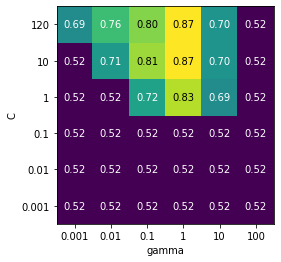

In [10]:
!pip install mglearn
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

The best set of parameters are 1 for gamma and 10 or 120 for C. I will use 10 for C to make it simpler.

In [11]:
# Training the SVC model
svc = SVC(gamma = 1, C = 10)
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

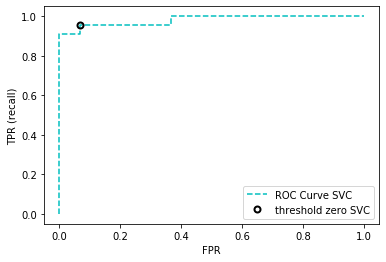

In [12]:
# Plotting a ROC Curve
from sklearn.metrics import roc_curve
def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr, tpr, label="ROC Curve SVC", linestyle = '--', c = 'c')
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

plot_roc_curve()

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). 

Classifiers that give curves closer to the top-left corner indicate a better performance. Since it is close to the top-left corner it can be said that the model has a good performance.

## Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the Cardiotocography Data Set: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the morphologic pattern and the other the fetal state.
* Comment on the time and preformance metrics used in each model.

In [13]:
# Loading the dataset
!pip install xlrd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls'
s = requests.get(url).content
df = pd.read_excel(BytesIO(s), sheet_name = 'Data', header = 1)

In [14]:
# Displaying first 5 rows and all the columns of the dataframe
pd.options.display.max_columns = None
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Unnamed: 31,A,B,C,D,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   float64
 1   e            2126 non-null   float64
 2   AC           2126 non-null   float64
 3   FM           2127 non-null   float64
 4   UC           2127 non-null   float64
 5   DL           2128 non-null   float64
 6   DS           2128 non-null   float64
 7   DP           2128 non-null   float64
 8   DR           2128 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  LB           2126 non-null   float64
 11  AC.1         2126 non-null   float64
 12  FM.1         2127 non-null   float64
 13  UC.1         2127 non-null   float64
 14  DL.1         2128 non-null   float64
 15  DS.1         2128 non-null   float64
 16  DP.1         2128 non-null   float64
 17  ASTV         2127 non-null   float64
 18  MSTV         2127 non-null   float64
 19  ALTV  

For this task we will use only columns from 10 to 30 for the independent variable and column 43 CLASS and column 45 NSP as dependent variables.

In [16]:
# Replacing the null values in the independent variables with the mean of the columns.
df.iloc[:, 10:31] = df.iloc[:, 10:31].fillna(df.iloc[:, 10:31].mean())

In [17]:
# Replacing the null values in the dependent variables with the mode of the columns.
df['CLASS'].fillna(df['CLASS'].mode()[0], inplace=True)
df['NSP'].fillna(df['NSP'].mode()[0], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   float64
 1   e            2126 non-null   float64
 2   AC           2126 non-null   float64
 3   FM           2127 non-null   float64
 4   UC           2127 non-null   float64
 5   DL           2128 non-null   float64
 6   DS           2128 non-null   float64
 7   DP           2128 non-null   float64
 8   DR           2128 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  LB           2129 non-null   float64
 11  AC.1         2129 non-null   float64
 12  FM.1         2129 non-null   float64
 13  UC.1         2129 non-null   float64
 14  DL.1         2129 non-null   float64
 15  DS.1         2129 non-null   float64
 16  DP.1         2129 non-null   float64
 17  ASTV         2129 non-null   float64
 18  MSTV         2129 non-null   float64
 19  ALTV  

In [19]:
# Setting X and y values
X = df.iloc[:, 10:31]
y_mor = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y_mor, random_state = 42)

In [20]:
# Modelling for the prediction of Morphologic Pattern
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([("scaler", MinMaxScaler()), ("knc", KNeighborsClassifier())])

param_grid = {'knc__n_neighbors': [1, 10, 20, 50, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))


Best cross-validation accuracy: 0.76
Test set score: 0.77
Best parameters: {'knc__n_neighbors': 1}


In [21]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.82
Test set score: 0.84
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}


SVC has a better performance than k-nearest neighbors classifier to predict the Morphologic pattern.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from time import time
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C = 100, gamma = 0.1))])
start = time()
pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))
print("Pipeline took %.2f seconds." % (time() - start))

Test score: 0.84
Pipeline took 0.07 seconds.


In [23]:
# Checking the parameters of KNeighborsClassifier for the prediction of the fetal state
X = df.iloc[:, 10:31]
y_fet = df['NSP']

X_train, X_test, y_train, y_test = train_test_split(X, y_fet, random_state = 42)

pipe = Pipeline([("scaler", MinMaxScaler()), ("knc", KNeighborsClassifier())])
param_grid = {'knc__n_neighbors': [1, 10, 20, 50, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
start = time()
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
print("GridSearchCV took %.2f seconds." % (time() - start))

Best cross-validation accuracy: 0.91
Test set score: 0.90
Best parameters: {'knc__n_neighbors': 1}
GridSearchCV took 0.70 seconds.


In [24]:
# Checking the parameters of SVC for the prediction of the fetal state
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
start = time()
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
print("GridSearchCV took %.2f seconds." % (time() - start))

Best cross-validation accuracy: 0.92
Test set score: 0.93
Best parameters: {'svm__C': 100, 'svm__gamma': 1}
GridSearchCV took 10.26 seconds.


SVC seems to have a slightly better accuracy score.

In [25]:
# Modelling for the prediction of the fetal state.
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C = 100, gamma = 1))])

start = time()
pipe.fit(X_train, y_train)

print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))
print("Pipeline took %.2f seconds." % (time() - start))

Test score: 0.93
Pipeline took 0.06 seconds.


* I tried different parameters for both k-nearest neighbors(KNN) and SVC algorithms.

* For the prediction of morphologic pattern, SVC with the parameters c = 100 and gamma = 0.1 is the best model. The model's test score is 0.84.

* For the prediction of the fetal state, SVC with the parameters c = 100 and gamma = 1 is the best model. The model's test score is 0.93